In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torchvision.models as models
import matplotlib.pyplot as plt
import torch.nn as nn
import time
import io
import copy
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import torchattacks

import torchmetrics.functional as tmF
from torchmetrics.functional.image import peak_signal_noise_ratio, structural_similarity_index_measure

In [2]:
class_name = [
    'Cardboard',
    'E-waste',
    'Glass',    
    'Medical',
    'Metal',
    'Paper',
    'Plastic'
]
num_classes = 7
model_path = 'best_ARD_Alpha=0.9_Mobilenetv3Small_v1_epoch42'

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Model Initialization

In [4]:

# Load the trained model

preprocessing = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor()
])


if "Mobile" in model_path:
    model = models.mobilenet_v3_small()
    model.classifier = nn.Sequential(
        nn.Linear(in_features=576, out_features=1024, bias=True),
        nn.Hardswish(),
        nn.Dropout(p=0.2, inplace=True),
        nn.Linear(in_features=1024, out_features=num_classes, bias=True)
    )
elif "VGG" in model_path:
    model = models.vgg16()
    model.classifier = nn.Sequential(
        nn.Linear(in_features=25088, out_features=4096, bias=True),
        nn.ReLU(inplace=True),
        nn.Dropout(p=0.5, inplace=False),
        nn.Linear(in_features=4096, out_features=4096, bias=True),
        nn.ReLU(inplace=True),
        nn.Dropout(p=0.5, inplace=False),
        nn.Linear(in_features=4096, out_features=num_classes, bias=True)
    ) 
elif "Googlenet" in model_path:
    model = models.googlenet(weights=models.GoogLeNet_Weights.DEFAULT)
    infeatures = model.fc.in_features
    model.fc = nn.Linear(infeatures, num_classes, True)
elif "Resnet" in model_path:
    print("Using model Resnet50")
    model = models.resnet50()
    infeatures = model.fc.in_features
    model.fc = nn.Linear(infeatures, num_classes, True)
elif "Inception" in model_path:
    model = models.inception_v3()
    infeatures = model.fc.in_features
    model.aux_logits = False
    model.fc = nn.Linear(infeatures, num_classes, True)

model = model.to(device)

checkpoint = torch.load(f'./best_trained_models/{model_path}.pth')

if 'module' in list(checkpoint['net'].keys())[0]:
    new_state_dict = {k.replace("module.", ""): v for k, v in checkpoint['net'].items()}
    model.load_state_dict(new_state_dict)
else:
    model.load_state_dict(checkpoint['net'])

model = model.to(device)
model.eval()


MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

### Load data

In [138]:
# trash_test_dataset = torchvision.datasets.ImageFolder('./dataset/trashbox/test', transform=preprocessing)
# trash_test_loader = torch.utils.data.DataLoader(dataset=trash_test_dataset, shuffle=False, batch_size=64)

### Initialize Attack

In [5]:
attack = torchattacks.TPGD(model, steps=4)

### SSIM and PSNR

In [140]:
# examples = iter(trash_test_loader)
# sample, labels = next(examples)
# sample, labels = sample.to(device), labels.to(device)

# adv_samples = attack(sample, labels)

# adv_image = adv_samples[0].cpu().numpy()

# adv_samples = adv_samples.to(device)
# clean_samples = sample.to(device)

# print(peak_signal_noise_ratio(adv_samples, clean_samples, reduction='elementwise_mean'))
# print(structural_similarity_index_measure(adv_samples, clean_samples, reduction='elementwise_mean'))

### Normal Eval

In [6]:
trash_test_dataset = torchvision.datasets.ImageFolder('./dataset/trashbox/test', transform=preprocessing)
trash_test_loader = torch.utils.data.DataLoader(dataset=trash_test_dataset, shuffle=True, batch_size=1)

In [142]:
# examples = iter(trash_test_loader)
# sample, labels = next(examples)
# sample, labels = sample.to(device), labels.to(device)

In [143]:
# # Convert samples to numpy array and extract a single image
# image = sample[0].cpu().numpy()

# # Transpose the image from (C, H, W) to (H, W, C)
# image = np.transpose(image, (1, 2, 0))

# # Plot the image
# plt.imshow(image)

# # Show the plot
# plt.show()

In [144]:
# examples = iter(trash_test_loader)
# samples, labels = next(examples)
# # Ensure that samples are in CPU and convert to numpy
# attack = torchattacks.PGD(model)

# adv_samples = attack(samples, labels)

# # Convert samples to numpy array and extract a single image
# adv_image = adv_samples[0].cpu().numpy()

# # Transpose the image from (C, H, W) to (H, W, C)
# image = np.transpose(adv_image, (1, 2, 0))

# # Plot the image
# plt.imshow(image)

# # Show the plot
# plt.show()

In [145]:
# adv_samples = adv_samples.to(device)
# samples = samples.to(device)

# print(peak_signal_noise_ratio(samples, adv_samples, reduction='elementwise_mean'))
# print(structural_similarity_index_measure(samples, adv_samples, reduction='elementwise_mean'))

In [7]:
model.eval()

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

In [147]:
# from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
# from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
# from pytorch_grad_cam.utils.image import show_cam_on_image
# from torchvision.models import resnet50


# target_layers = model.features[12][1]
# input_tensor = sample

# # Construct the CAM object once, and then re-use it on many images:
# cam = GradCAM(model=model, target_layers=target_layers)

# targets = [ClassifierOutputTarget(281)]

# # You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
# grayscale_cam = cam(input_tensor=input_tensor, targets=targets)

# # In this example grayscale_cam has only one image in the batch:
# grayscale_cam = grayscale_cam[0, :]
# visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

### Latency Distribution

In [148]:
# inference_times = []
# for images, targets in trash_test_loader:
#     images, targets = images.to(device), targets.to(device)
#     start_time = time.time()
#     with torch.no_grad():
#         output = model(images)  # Add batch dimension
#     inference_time = time.time() - start_time
#     inference_times.append(inference_time)

# # Calculate statistics
# avg_inference_time = np.mean(inference_times)
# max_inference_time = np.max(inference_times)
# min_inference_time = np.min(inference_times)

# # Plot the latency distribution
# plt.hist(inference_times, bins=50, density=True)
# plt.xlabel('Latency (seconds)')
# plt.ylabel('Probability Density')
# plt.title('Latency Distribution')

# plt.text(0.5, 0.95, f'Average: {avg_inference_time:.4f} s', ha='center', va='center', transform=plt.gca().transAxes)
# plt.text(0.5, 0.90, f'Highest: {max_inference_time:.4f} s', ha='center', va='center', transform=plt.gca().transAxes)
# plt.text(0.5, 0.85, f'Lowest: {min_inference_time:.4f} s', ha='center', va='center', transform=plt.gca().transAxes)

# plt.show()

### Memory Footprint

In [149]:
# # Measure memory footprint
# with torch.no_grad():
#     predictions = model(sample)
# torch.cuda.reset_peak_memory_stats(device=device)
# print("Memory Footprint:", torch.cuda.max_memory_allocated(device=device) / (1024 ** 2), "MB")

### GFLOPS and Parameter size

In [150]:
# # Count the number of parameters
# num_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
# print("Number of parameters:", num_params)

# # Dummy inference to measure execution time
# model.eval()
# with torch.no_grad():
#     start_time = time.time()
#     output = model(sample)
#     end_time = time.time()

# # Calculate GFLOPs
# execution_time = end_time - start_time
# flops = num_params * 2  # Assuming one FLOP for each parameter multiplication and addition
# gflops = (flops / execution_time) / 1e9  # Divide by 1e9 to convert to GFLOPs
# print("GFLOPs:", gflops)

### Confusion Matrix on Clean Images

c:\Users\Acer\.conda\envs\thesisaimodel\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


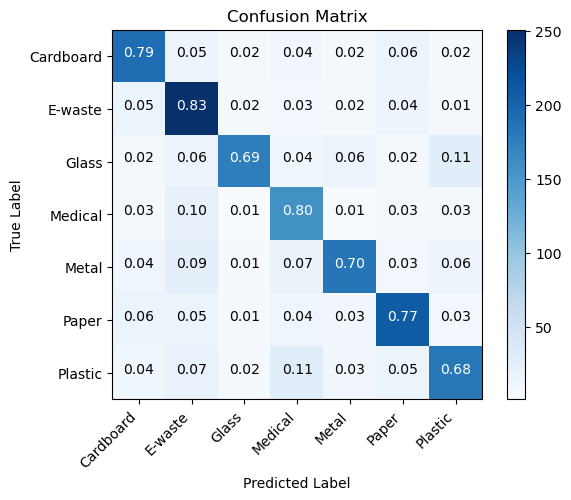

In [151]:
model.eval()  # Set the model to evaluation mode
val_labels = []
predicted_labels = []
with torch.no_grad():
    for images, labels in trash_test_loader:
        images = images.to(device)
        predictions = model(images)
        _, preds = torch.max(predictions, 1)
        val_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(preds.cpu().numpy())

# Create confusion matrix
conf_matrix = confusion_matrix(val_labels, predicted_labels)

# Plot confusion matrix
plt.imshow(conf_matrix, cmap=plt.cm.Blues, interpolation='nearest')
# Set x-axis labels (predicted labels)
plt.xticks(range(len(class_name)), class_name, rotation=45, ha='right')  # Rotate for better readability

# Set y-axis labels (true labels)
plt.yticks(range(len(class_name)), class_name)

plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix[i, j] / np.sum(conf_matrix[i]):.2f}',
            horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.show()

### Confusion Matrix for Adversarial samples

c:\Users\Acer\.conda\envs\thesisaimodel\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


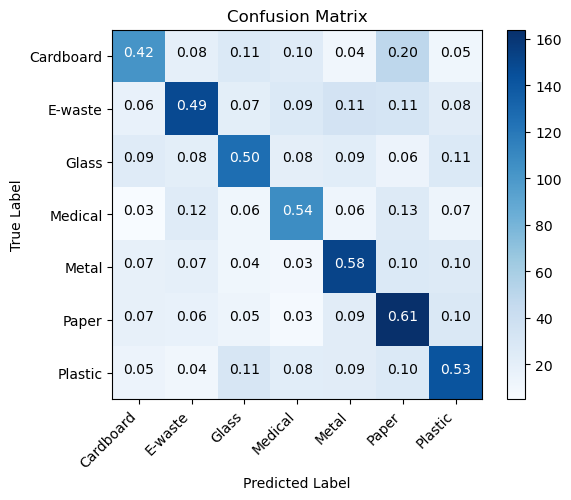

In [152]:
model.eval()  
val_labels = []
predicted_labels = []
with torch.no_grad():
    for images, labels in trash_test_loader:
        images, labels = images.to(device), labels.to(device)
        with torch.enable_grad():
            adv_images = attack(images, labels)
        predictions = model(adv_images)
        _, preds = torch.max(predictions, 1)
        val_labels.extend(labels.cpu().numpy().tolist())
        predicted_labels.extend(preds.cpu().numpy().tolist())

# Create confusion matrix
conf_matrix = confusion_matrix(val_labels, predicted_labels)

# Plot confusion matrix
plt.imshow(conf_matrix, cmap=plt.cm.Blues, interpolation='nearest')
# Set x-axis labels (predicted labels)
plt.xticks(range(len(class_name)), class_name, rotation=45, ha='right')  # Rotate for better readability

# Set y-axis labels (true labels)
plt.yticks(range(len(class_name)), class_name)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, f'{conf_matrix[i, j] / np.sum(conf_matrix[i]):.2f}',
            horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.show()

### Precision, Recall, ROC, Precision-Recall Curve, Accuracy, Robust Accuracy, F1 Score

In [153]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torchvision
import torchvision.models as models
import torch.optim as optim
import os
import torchvision.transforms as transforms
import torchvision.transforms.functional as TF
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter
import torch
import torch.nn as nn
from sklearn.metrics import f1_score, precision_score, precision_recall_curve, recall_score, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(model, test_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.eval()

    all_targets = []
    all_clean_pred = []
    all_adv_pred = []
    all_clean_prob = []
    all_adv_prob = []

    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device), targets.to(device)

            with torch.enable_grad():
                adv_images = attack(inputs, targets)
            
            # Get Logits
            clean_outputs = model(inputs)
            adv_outputs = model(adv_images)
            
            # Get top 1 prediction
            _, clean_pred = torch.max(clean_outputs, 1)
            _, adv_pred = torch.max(adv_outputs, 1)

            all_clean_pred.extend(clean_pred.cpu().numpy())
            all_adv_pred.extend(adv_pred.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())

            # Get Softmax probabilities
            all_clean_prob.extend(torch.softmax(clean_outputs, dim=1).cpu().numpy())
            all_adv_prob.extend(torch.softmax(adv_outputs, dim=1).cpu().numpy())

    return all_targets, all_clean_pred, all_adv_pred, all_clean_prob, all_adv_prob

In [154]:
all_targets, all_clean_pred, all_adv_pred, all_clean_prob, all_adv_prob = evaluate_model(model, trash_test_loader)

f1 = f1_score(all_targets, all_clean_pred, average='macro')
adv_f1 = f1_score(all_targets, all_adv_pred, average='macro')
precision = precision_score(all_targets, all_clean_pred, average='macro')
adv_precision = precision_score(all_targets, all_adv_pred, average='macro')
recall = recall_score(all_targets, all_clean_pred, average='macro')
adv_recall = precision_score(all_targets, all_adv_pred, average='macro')

top1_accuracy = sum(1 for x, y in zip(all_clean_pred, all_targets) if x == y) / len(all_clean_pred)
top1_adv_accuracy = sum(1 for x, y in zip(all_adv_pred, all_targets) if x == y) / len(all_adv_pred)

print('Total Number of sample: ', len(all_targets))
print('<=======   Natural performance ======>')
print('F1 Score: ', 100. * f1)
print('Precision: ', 100. * precision)
print('Recall: ', 100. * recall)
print('Top 1 Accuracy: ', 100. * top1_accuracy)
print('<=======   Robust performance ======>')
print('F1 Score: ', 100. * adv_f1)
print('Precision: ', 100. * adv_precision)
print('Recall: ', 100. * adv_recall)
print('Top 1 Accuracy: ', 100. * top1_adv_accuracy)

c:\Users\Acer\.conda\envs\thesisaimodel\Lib\site-packages\PIL\Image.py:981: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


KeyboardInterrupt: 

: 

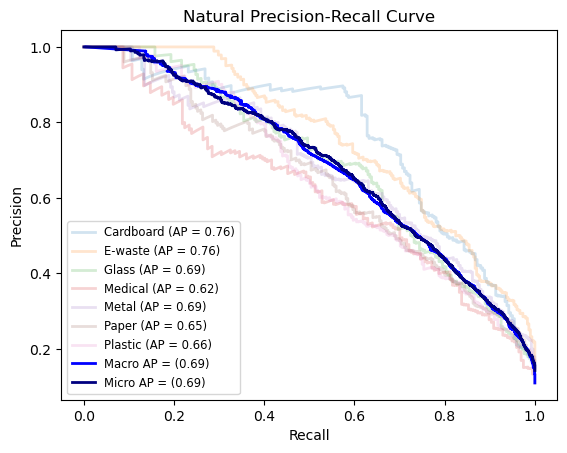

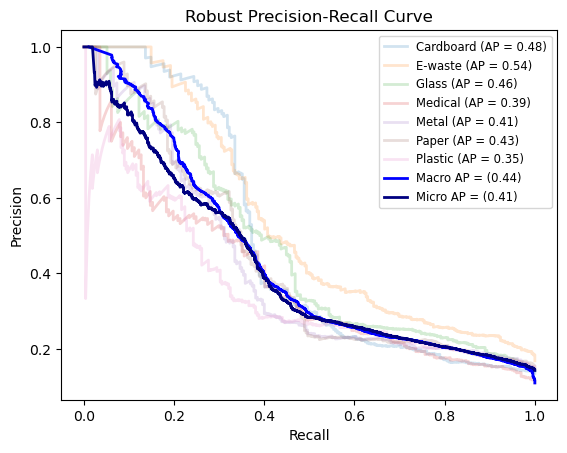

In [ ]:
from sklearn.metrics import average_precision_score

all_targets = np.array(all_targets)

all_clean_prob = np.array(all_clean_prob)
clean_precision_curve = dict()
clean_recall_curve = dict()
clean_AP = dict()
for i in range(all_clean_prob.shape[1]):
    clean_precision_curve[i], clean_recall_curve[i], _ = precision_recall_curve(all_targets == i, all_clean_prob[:, i])
    clean_AP[i] = average_precision_score(all_targets == i, all_clean_prob[:, i])


all_clean_prob = torch.tensor(all_clean_prob)
all_clean_target = torch.tensor(all_targets)

macro_clean_precision, macro_clean_recall, _ = tmF.precision_recall_curve(all_clean_prob, all_clean_target, task='multiclass', average='macro', num_classes=7)
micro_clean_precision, micro_clean_recall, _ = tmF.precision_recall_curve(all_clean_prob, all_clean_target, task='multiclass', average='micro', num_classes=7)
macro_clean_AP = average_precision_score(all_targets, all_clean_prob, average='macro')
micro_clean_AP = average_precision_score(all_targets, all_clean_prob, average='micro')

plt.figure()
for i in range(len(clean_precision_curve)):
    plt.plot(clean_recall_curve[i], clean_precision_curve[i], lw=2, alpha=0.2, label=f'{class_name[i]} (AP = {clean_AP[i]:0.2f})')
plt.plot(macro_clean_recall, macro_clean_precision, color='b', lw=2, alpha=1, label=f'Macro AP = ({macro_clean_AP:0.2f})')
plt.plot(micro_clean_recall, micro_clean_precision, color='navy', lw=2, alpha=1, label=f'Micro AP = ({micro_clean_AP:0.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Natural Precision-Recall Curve')
plt.legend(loc="best", fontsize='small')
plt.show()

all_adv_prob = np.array(all_adv_prob)
adv_precision_curve = dict()
adv_recall_curve = dict()
adv_AP = dict()
for i in range(all_adv_prob.shape[1]):
    adv_precision_curve[i], adv_recall_curve[i], _ = precision_recall_curve(all_targets == i, all_adv_prob[:, i])
    adv_AP[i] = average_precision_score(all_targets == i, all_adv_prob[:, i])

all_adv_prob = torch.tensor(all_adv_prob)
all_adv_target = torch.tensor(all_targets)

macro_adv_precision, macro_adv_recall, _ = tmF.precision_recall_curve(all_adv_prob, all_adv_target, task='multiclass', average='macro', num_classes=7)
micro_adv_precision, micro_adv_recall, _ = tmF.precision_recall_curve(all_adv_prob, all_adv_target, task='multiclass', average='micro', num_classes=7)
macro_adv_AP = average_precision_score(all_targets, all_adv_prob, average='macro')
micro_adv_AP = average_precision_score(all_targets, all_adv_prob, average='micro')

plt.figure()
for i in range(len(adv_precision_curve)):
    plt.plot(adv_recall_curve[i], adv_precision_curve[i], lw=2, alpha=0.2, label=f'{class_name[i]} (AP = {adv_AP[i]:0.2f})')
plt.plot(macro_adv_recall, macro_adv_precision, color='b', lw=2, alpha=1, label=f'Macro AP = ({macro_adv_AP:0.2f})')
plt.plot(micro_adv_recall, micro_adv_precision, color='navy', lw=2, alpha=1, label=f'Micro AP = ({micro_adv_AP:0.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Robust Precision-Recall Curve')
plt.legend(loc="best", fontsize='small')
plt.show()


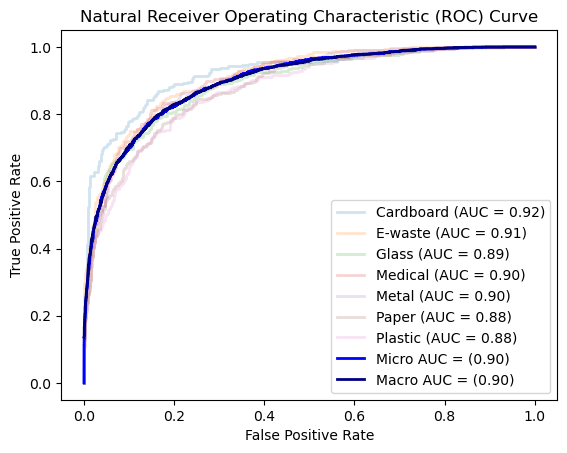

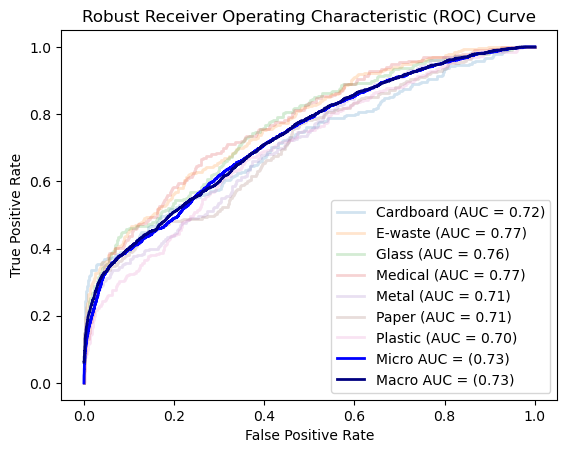

In [ ]:
fpr = dict()
tpr = dict()

roc_auc = dict()
for i in range(all_clean_prob.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(all_targets == i, all_clean_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
  
micro_clean_fpr, micro_clean_tpr, _ = tmF.roc(all_clean_prob, all_clean_target, task='multiclass', average='micro', num_classes=7)
micro_clean_AUC = auc(micro_clean_fpr, micro_clean_tpr)
macro_clean_fpr, macro_clean_tpr, _ = tmF.roc(all_clean_prob, all_clean_target, task='multiclass', average='macro', num_classes=7)
macro_clean_AUC = auc(macro_clean_fpr, macro_clean_tpr)

plt.figure()
for i in range(len(fpr)):
    plt.plot(fpr[i], tpr[i], lw=2, alpha=0.2, label='{} (AUC = {:.2f})'.format(class_name[i], roc_auc[i]))
plt.plot(micro_clean_fpr, micro_clean_tpr, color='b', lw=2, alpha=1, label=f'Micro AUC = ({micro_clean_AUC:0.2f})')
plt.plot(macro_clean_fpr, macro_clean_tpr, color='navy', lw=2, alpha=1, label=f'Macro AUC = ({macro_clean_AUC:0.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Natural Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


fpr = dict()
tpr = dict()

roc_auc = dict()
for i in range(all_adv_prob.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(all_targets == i, all_adv_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
  
micro_adv_fpr, micro_adv_tpr, _ = tmF.roc(all_adv_prob, all_adv_target, task='multiclass', average='micro', num_classes=7)
micro_adv_AUC = auc(micro_adv_fpr, micro_adv_tpr)
macro_adv_fpr, macro_adv_tpr, _ = tmF.roc(all_adv_prob, all_adv_target, task='multiclass', average='macro', num_classes=7)
macro_adv_AUC = auc(macro_adv_fpr, macro_adv_tpr)

plt.figure()
for i in range(len(fpr)):
    plt.plot(fpr[i], tpr[i], lw=2, alpha=0.2, label='{} (AUC = {:.2f})'.format(class_name[i], roc_auc[i]))
plt.plot(micro_adv_fpr, micro_adv_tpr, color='b', lw=2, alpha=1, label=f'Micro AUC = ({micro_adv_AUC:0.2f})')
plt.plot(macro_adv_fpr, macro_adv_tpr, color='navy', lw=2, alpha=1, label=f'Macro AUC = ({macro_adv_AUC:0.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Robust Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



# Grad Cam

In [ ]:
# class VGG(nn.Module):
#     def __init__(self):
#         super(VGG, self).__init__()
        
#         # get the pretrained VGG19 network
#         self.vgg = models.vgg19(pretrained=True)
#         self.vgg.classifier = nn.Sequential(
#             nn.Linear(in_features=25088, out_features=4096, bias=True),
#             nn.ReLU(inplace=True),
#             nn.Dropout(p=0.5, inplace=False),
#             nn.Linear(in_features=4096, out_features=4096, bias=True),
#             nn.ReLU(inplace=True),
#             nn.Dropout(p=0.5, inplace=False),
#             nn.Linear(in_features=4096, out_features=7, bias=True)
#         )
#         # disect the network to access its last convolutional layer
#         self.features_conv = self.vgg.features[:36]
        
#         # get the max pool of the features stem
#         self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        
#         # get the classifier of the vgg19
#         self.classifier = self.vgg.classifier
        
#         # placeholder for the gradients
#         self.gradients = None
    
#     # hook for the gradients of the activations
#     def activations_hook(self, grad):
#         self.gradients = grad
        
#     def forward(self, x):
#         x = self.features_conv(x)

#         # register the hook
#         h = x.register_hook(self.activations_hook)
        
#         # apply the remaining pooling
#         x = self.max_pool(x)
#         x = x.view((1, -1))
#         x = self.classifier(x)
#         return x
    
#     # method for the gradient extraction
#     def get_activations_gradient(self):
#         return self.gradients
    
#     # method for the activation exctraction
#     def get_activations(self, x):
#         return self.features_conv(x)

In [184]:
class MobilenetV3Small(nn.Module):
    def __init__(self):
        super(MobilenetV3Small, self).__init__()
        
        self.mnv3_small = models.mobilenet_v3_small(weights=None)
        self.mnv3_small.classifier = nn.Sequential(
        nn.Linear(in_features=576, out_features=1024, bias=True),
        nn.Hardswish(),
        nn.Dropout(p=0.2, inplace=True),
        nn.Linear(in_features=1024, out_features=7, bias=True)
        )
        checkpoint = torch.load(f'./best_trained_models/{model_path}.pth')

        if 'module' in list(checkpoint['net'].keys())[0]:
            new_state_dict = {k.replace("module.", ""): v for k, v in checkpoint['net'].items()}
            model.load_state_dict(new_state_dict)
        else:
            model.load_state_dict(checkpoint['net'])
            
        # disect the network to access its last convolutional layer
        self.features_conv = self.mnv3_small.features
        
        # get the max pool of the features stem
        self.max_pool = self.mnv3_small.avgpool
        
        self.classifier = self.mnv3_small.classifier
        
        # placeholder for the gradients
        self.gradients = None
    
    # hook for the gradients of the activations
    def activations_hook(self, grad):
        self.gradients = grad
        
    def forward(self, x):
        x = self.features_conv(x)

        # register the hook
        h = x.register_hook(self.activations_hook)
        
        # apply the remaining pooling
        x = self.max_pool(x)
        x = x.view((1, -1))
        x = self.classifier(x)
        return x
    
    # method for the gradient extraction
    def get_activations_gradient(self):
        return self.gradients
    
    # method for the activation exctraction
    def get_activations(self, x):
        return self.features_conv(x)

In [185]:
sample, target = next(iter(trash_test_loader))

tensor([[ 0.0321,  0.0135, -0.0188,  0.0005, -0.0033, -0.0135,  0.0195]],
       grad_fn=<AddmmBackward0>)


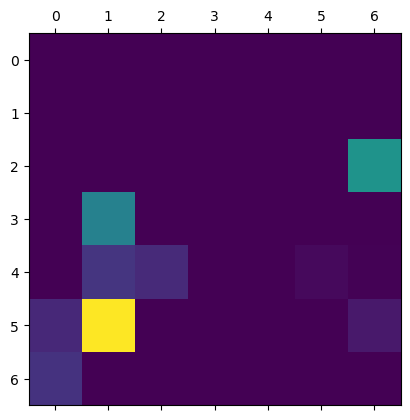

In [186]:
mnv3 = MobilenetV3Small()

mnv3.eval()
pred = mnv3(sample)
print(pred)

pred[:, target].backward()
gradients = mnv3.get_activations_gradient()

pooled_gradients = torch.mean(gradients, dim=[0,2,3])
activations = mnv3.get_activations(sample).detach()

for i in range(576):
    activations[:, i, :, :] *= pooled_gradients[i]

# average the channels of the activations
heatmap = torch.mean(activations, dim=1).squeeze()

# relu on top of the heatmap
# expression (2) in https://arxiv.org/pdf/1610.02391.pdf
heatmap = np.maximum(heatmap, 0)

# normalize the heatmap
heatmap /= torch.max(heatmap)

# draw the heatmap
plt.matshow(heatmap.squeeze())

heatmap = heatmap.cpu().detach().numpy()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]
[[[128   0   0]
  [128   0   0]
  [128   0   0]
  ...
  [128   0   0]
  [128   0   0]
  [128   0   0]]

 [[128   0   0]
  [128   0   0]
  [128   0   0]
  ...
  [128   0   0]
  [128   0   0]
  [128   0   0]]

 [[128   0   0]
  [128   0   0]
  [128   0   0]
  ...


True

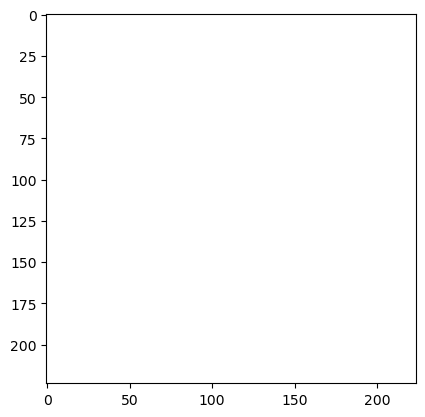

In [187]:
import cv2
# img = cv2.imread('./dataset/trashbox/test/cardboard/cardboard 2308.jpg')
# print(sample)
# print(img.dtype)
sample = sample[0].cpu().numpy()
sample = np.transpose(sample, (1, 2, 0))
sample = sample * 255
print(sample)
plt.imshow(sample)

heatmap = (heatmap - np.min(heatmap)) / (np.max(heatmap) - np.min(heatmap))
heatmap = cv2.resize(heatmap, (sample.shape[1], sample.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

print(heatmap)

superimposed_img = heatmap * 0.4 + sample
cv2.imwrite('./map.jpg', superimposed_img)